In [1]:
# Imports the scikit-learn function to load the open diabetes dataset
from sklearn.datasets import load_diabetes
# Loads the diabetes dataset
diabetes = load_diabetes()
# Extracts the features and the target variable
X, y = diabetes['data'], diabetes['target']

In [2]:
# Imports the pandas library to convert the sk learn dataset into a pandas dataframe
import pandas as pd
# Mapping the feature names provided by Scikit-Learn to a more readable form
feature_rename = {'age' : 'Age',
                  'sex' : 'Sex',
                  'bmi' : 'BMI',
                  'bp': 'BP',
                  's1': 'Total Cholesterol',
                  's2': 'LDL',
                  's3': 'HDL',
                  's4': 'Thyroid',
                  's5': 'Glaucoma',
                  's6': 'Glucose'}

# Loads all the features (x) into a dataframe. 
# Uses the sk-learn feature names as column names
df_data = pd.DataFrame(X, columns = diabetes['feature_names'])

# Renames the sk-learn feature names to a more readable form
df_data.rename(columns = feature_rename, inplace = True)

# Stores the list
feature_names = list(df_data.columns.values)

# Includes the target varable (y) as a separate column
df_data['target'] = y              

### Plotting the correlation matrix

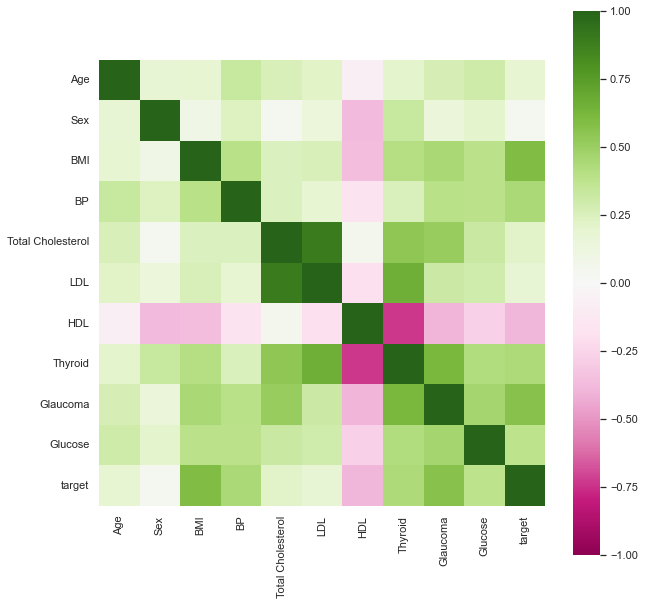

In [3]:
# A variable to store the correlation matrix
corr = df_data.corr()

# Imports Matplotlib and SEaborn to plot the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')
sns.set_palette('bright')

# Imitializes a Matplotlib plot with a predefined size
f, ax = plt.subplots(figsize = (10, 10))
# Uses Seaborn to plot a heatmap of the correlation coefficients
sns.heatmap(corr,
            vmin = -1, vmax = 1, center = 0,
            cmap = 'PiYG',
            square = True,
            ax = ax)

# Shows the plot
plt.show()

### Linear Regression

In [4]:
# Imports numpy to evaluate the performance of model
import numpy as np
# Imports the scikit-learn class for linear regression
from sklearn.linear_model import LinearRegression
# Imports the scikit-learn function to split the data into training and test sets
from sklearn.model_selection import train_test_split

# Splits the data into training and test sets, where 80% of the data is used for training and 20% of the data for testing, and ensures that the seed for the random- number generator is set using the random_state parameter to ensure consistent train-test splits
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)

# Initializes the linear regression model, which is based on least squares
lr_model = LinearRegression()

# Learns the weights for the model by fitting on the training set
lr_model.fit(X_train, y_train)

# Uses the learned weights to predict the disease progression for patients in the test set
y_pred = lr_model.predict(X_test)

# Evaluates the model performance using the mean absolute error (MAE) metric
mae = np.mean(np.abs(y_test - y_pred))

### Feature importance for the diabetes linear regression model

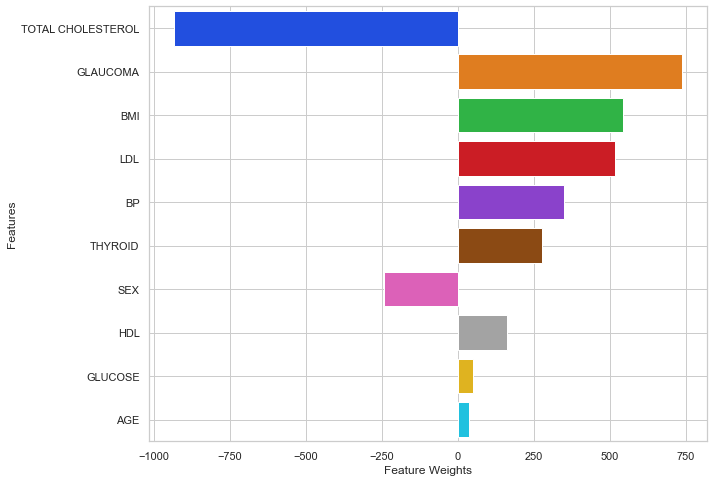

In [5]:
# Imports numpy to perform operation on vectors in an optimized way
#  import numpy as np (not needed)
# Imports matplotlib and seaborn to plot the feature importance
#  import matplotlib.pyplot as plt (not needed)
#  import seaborn as sns (not needed)
#  sns.set(style=’whitegrid’) (not needed)
#  sns.set_palette(‘bright’) (not needed)

# Obtains the weights from the linear regression model trained earlier using the coef_ parameter
weights = lr_model.coef_

# Sorts the weights in descending order of importance and gets their indices
feature_importance_idx = np.argsort(np.abs(weights))[::-1]

# Uses the ordered indices to get the feature names and the corresponding weight values
feature_importance = [feature_names[idx].upper() for idx in feature_importance_idx]
feature_importance_values = [weights[idx] for idx in feature_importance_idx]

# Generates the plot
f, ax = plt.subplots(figsize=(10, 8)) 
sns.barplot(x=feature_importance_values, y=feature_importance, ax=ax) 
ax.grid(True)
ax.set_xlabel('Feature Weights')
ax.set_ylabel('Features')
plt.show()

* The most important feature is the Total Cholesterol measurement. It has a large negative value for the weight. This means that a positive change in the cholesterol level has a large negative influence on predicting diabetes progression. This could be because Total Cholesterol also accounts for the good kind of cholesterol.


* If we now look at the bad cholesterol, or LDL, feature, it has a large positive weight, and it is also the fourth most important feature in predicting the progression of diabetes. This means that a positive change in LDL cholesterol level results in a large positive influence in predicting diabetes one year out.


* The good cholesterol, or HDL, feature has a small positive weight and is the third least important feature because if we observe the correlation among total cholesterol, LDL, and HDL, we see a very high correlation between total cholesterol and LDL and moderately high correlation between total cholesterol and HDL. Because of this correlation, the HDL feature is deemed redundant by the model.


* It also looks like the baseline Glucose measurement for the patient has a very small impact on predicting the progression of diabetes a year out. because Glucose measurement is very highly correlated with the baseline Glaucoma measurement